In [7]:
! pip install prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

  Using cached holidays-0.48-py3-none-any.whl.metadata (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 3.5 MB/s eta 0:00:00
Using cached holidays-0.48-py3-none-any.whl (1.0 MB)


In [8]:
df = pd.read_csv('AirPassengers.csv')
df.head(5)
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [9]:
df.head(5)


,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
df.tail(5)


,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [11]:
df


,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [14]:
import numpy as np
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])

In [15]:
df

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121
...,...,...,...
139,1960-08,6.406880,606
140,1960-09,6.230481,508
141,1960-10,6.133398,461
142,1960-11,5.966147,390


In [16]:
model = Prophet() #instantiate Prophet
model.fit(df)

18:12:45 - cmdstanpy - INFO - Chain [1] start processing
18:12:45 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
df.tail(5)


,ds,y,y_orig
139,1960-08,6.406880,606
140,1960-09,6.230481,508
141,1960-10,6.133398,461
142,1960-11,5.966147,390
143,1960-12,6.068426,432


In [18]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

df.tail(5)
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=10, freq = '15D')
future_data.tail(15)

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01
144,1960-12-16
145,1960-12-31
146,1961-01-15
147,1961-01-30
148,1961-02-14


In [19]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,6.375542,6.331569,6.417859
140,1960-09-01,6.233811,6.187934,6.279038
141,1960-10-01,6.117160,6.075547,6.160083
142,1960-11-01,5.982665,5.941289,6.024901
143,1960-12-01,6.097581,6.049086,6.140008
144,1960-12-16,6.155654,6.112016,6.200817
145,1960-12-31,6.134188,6.087760,6.178001
146,1961-01-15,5.990388,5.941029,6.032898
147,1961-01-30,6.090099,6.042713,6.138207
148,1961-02-14,6.333374,6.289753,6.381794


/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


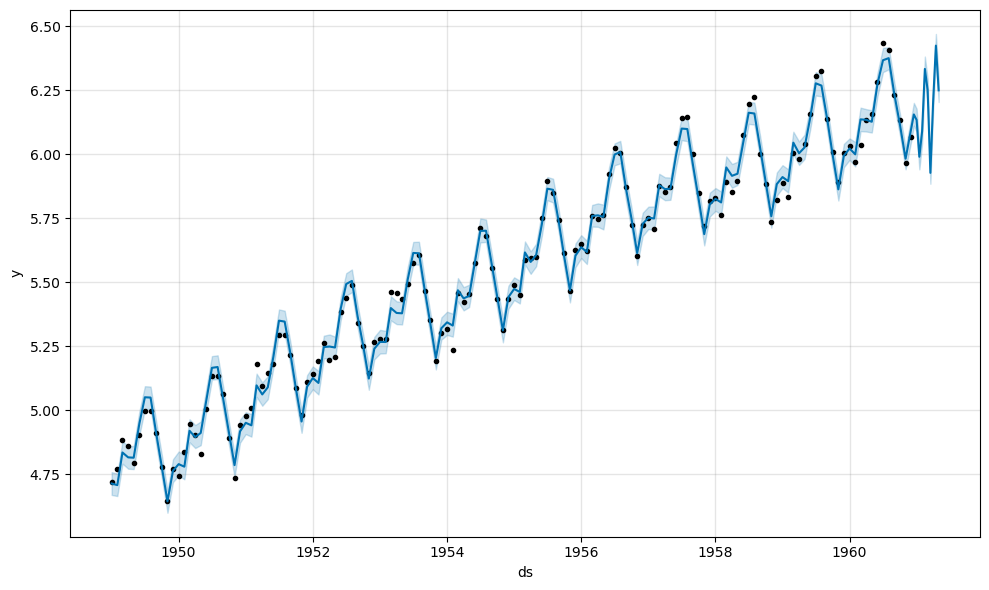

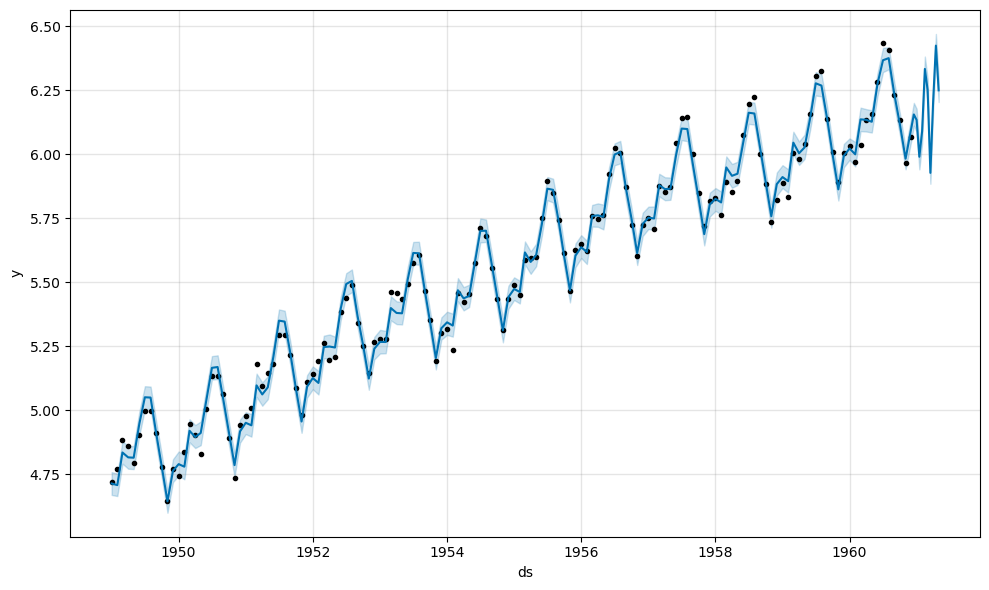

In [20]:
model.plot(forecast_data)


/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

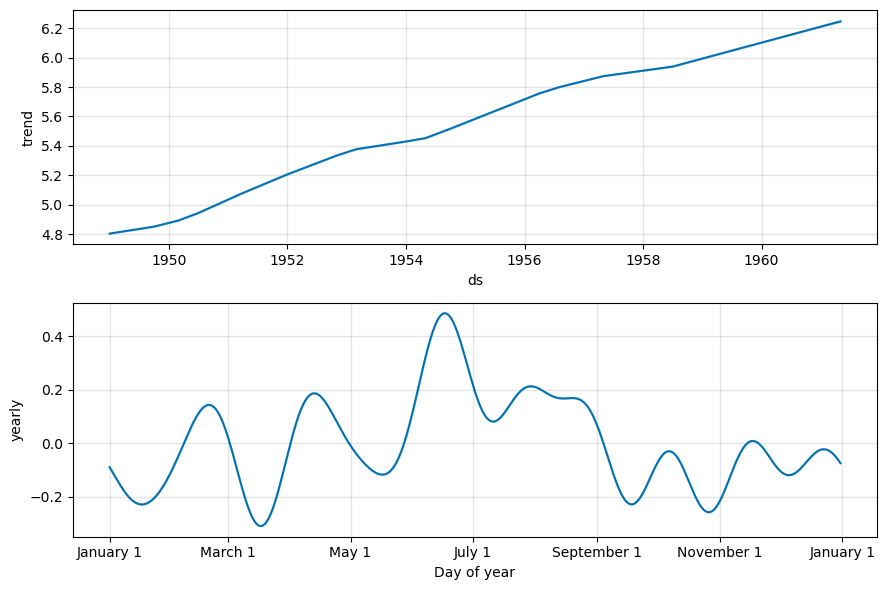

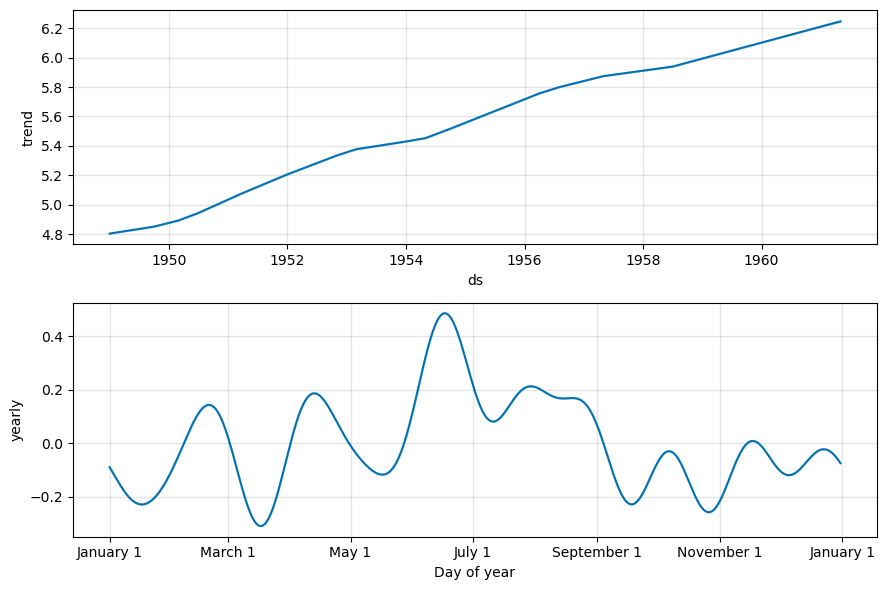

In [21]:
model.plot_components(forecast_data)


In [22]:

forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/sakshi/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


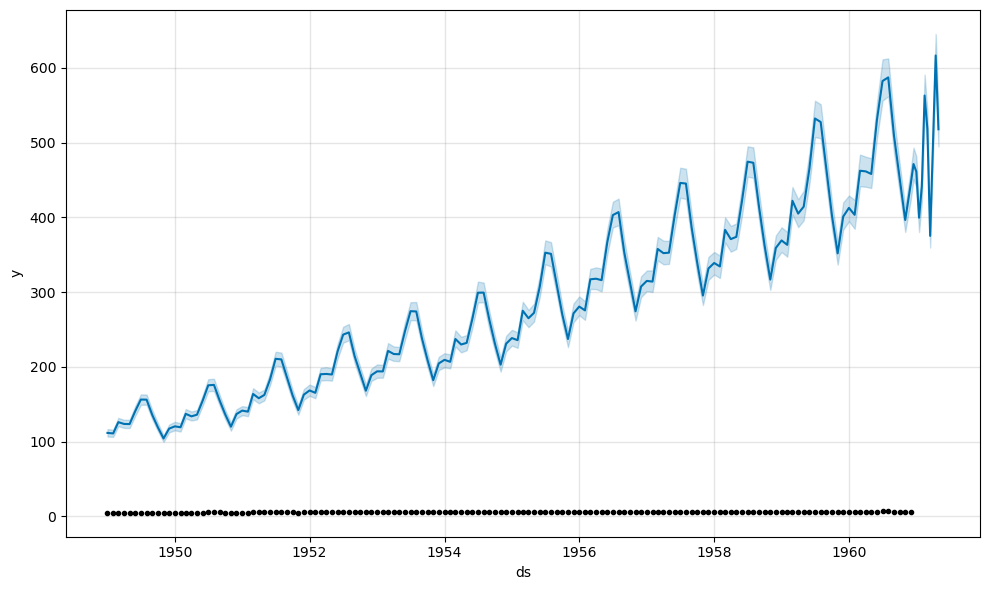

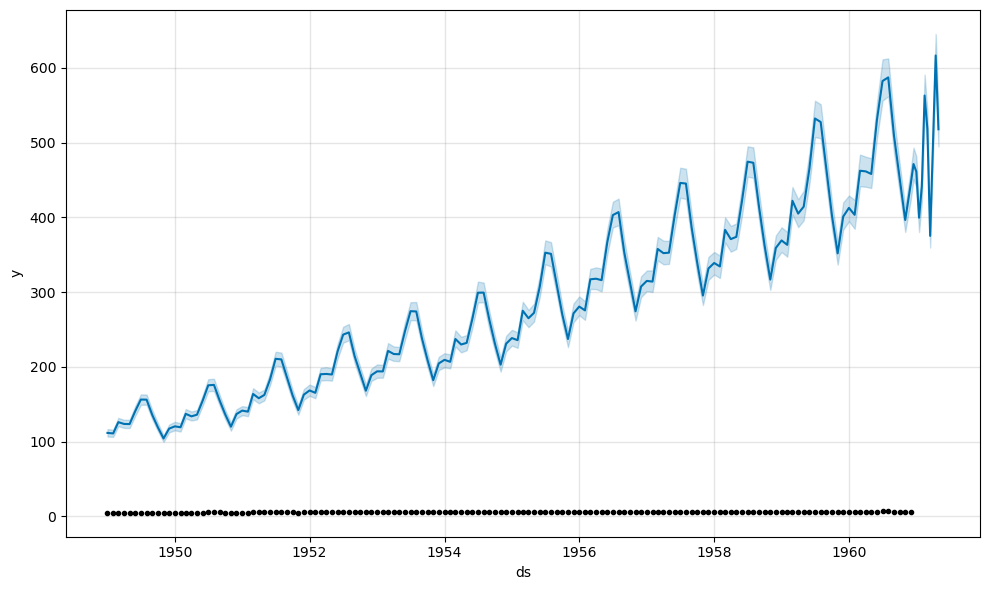

In [23]:
model.plot(forecast_data_orig)


In [24]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [25]:
final_df = pd.DataFrame(forecast_data_orig)


In [26]:
import plotly.graph_objs as go
import plotly.offline as py

In [27]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'